# Lab 04. Text Classification


This lab is devoted to text classification tasks.
- **Part 1 [8 points]** is about very common NLP problem - sentiment analysis.
- **Part 2 [7 points]** include tasks on POS tagging and WordEmbeddings.


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit

- Name your file according to this convention: `lab04_GroupNo_Surname_Name.ipynb`. If you don't have group number, put `nan` instead.
- Attach it to an **email** with **topic** `lab04_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`


Data can be dowloaded from: https://disk.yandex.ru/d/ixeu6m2KBG80ig

The deadline is **2021-11-17 23:00:00 +03:00**

## Part 1. Bag of Words vs. Bag of Popcorn [8 points]

This task is based on [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. The goal is to label film reviews as positive or negative. 

Reviews may look like this:

```
I dont know why people think this is such a bad movie. Its got a pretty good plot, some good action, and the change of location for Harry does not hurt either. Sure some of its offensive and gratuitous but this is not the only movie like that. Eastwood is in good form as Dirty Harry, and I liked Pat Hingle in this movie as the small town cop. If you liked DIRTY HARRY, then you should see this one, its a lot better than THE DEAD POOL. 4/5
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [3]:
reviews = pd.read_csv("reviews.tsv", sep="\t")
reviews.head(3)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...


In [4]:
X = reviews["review"]
y = reviews["sentiment"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=42, stratify=y)

### Time to extract features

In this part of the assignment we will apply several methods of feature extraction and comapre them.

**Task 1.1 [0.5 point] - Simple BOW** 

In this task we will build a simple bow representation - without any preprocessing. 

For this purpose we will use [*CountVectorizer*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) - a method that transforms text dataset into a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html).

Import CountVectorizer:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

Now try each of these approaches:
- fit vectorizer on X_train, apply to X_train, X_test
- fit vectorizer on X_train, apply to X_train; fit on X_test, apply to X_test
- fit vectorizer on X, apply to X_train, X_test

Report output matrix sizes in each case. 
- What is the difference? 
- Which of these approaches is the most fair and correct?

Use the most fair and correct one to get `X_train_0` and `X_test_0` - they will be needed for further tasks.

In [8]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 68482)


In [9]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)
count_vectorizer.fit(X_test)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 38591)


In [10]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 74849) (5000, 74849)


**Answer:** The most fair and correct approach is the third - we should fit our CountVecrotizer() on all data X. If we train only on the train data set we won't take into account words from test which are not in train set, and if we train separetely X_train and X_test we'll have different feature spaces (but for Linear regression and Random forest we need to have equal sizes of feature spaces).

**Task 1.2 [0.5 point] - S___se matrices**

What is the data type of `X_train_0` and `X_test_0`? What are those?

What differs them from usual np.arrays? Name several types how those special matrices are stored and what they are good for.

In [11]:
print(type(X_train_0), type(X_test_0))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>


**Answer:** the type is a Compressed Sparse Row sparse matrix. A sparse matrix is a matrix that is comprised of mostly zero values. Types of storing (link to the information resource: https://rushter.com/blog/scipy-sparse-matrices/):
- *Dictionary of keys (DOK)* Main idea to use a dictionary, where key represents indices. It's good for storing sparse data sets, but has slow arithmetics and slicing.
- *List of list (LIL)* It uses two numpy arrays with regular Python lists inside them. The rows array stores information about occupied cells, whereas the data array stores corresponding values. It also has slow arithmetics and memory greedy.
- *Compressed sparse row (CSR)* CSR is based on three numpy arrays: **data** is an array which contains all non-zero entries in the row-major order, **indptr** points to row starts (i.e., tells where each row begins), **indices** is array of column indices (i.e., tells us which cells have non-zero values). This type is good for fast arithmetics.



**Task 1.3 [1 points] - Training**

Train LogisticRegression and Random forest on this data representations.
- Compare training time 
- Compare Accuracy, precision, recall 
- Plot ROC Curve and calculate ROC AUC (don't forget to predict_proba) 
- Plot Precision-Recall curve and calculate f1-score (for example, with `plt.subplots(nrows=1, ncols=2)`)
- Print the trickiest missclassified objects. Why they were hard to classify? 


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time as tm

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [14]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=4)
lr_model = LogisticRegression(max_iter=1e5)

In [15]:
t = tm.time()
lr_model.fit(X_train_0, y_train)
lr_time = tm.time() - t

print(lr_time)

8.808287143707275


In [16]:
t = tm.time()
rf_model.fit(X_train_0, y_train)
rf_time = tm.time() - t

print(rf_time)

52.24323892593384


In [17]:
print("LR accuracy: {}, precision: {} and recall: {}".format(accuracy_score(lr_model.predict(X_test_0), y_test), 
                                                             precision_score(lr_model.predict(X_test_0), y_test),
                                                             recall_score(lr_model.predict(X_test_0), y_test)))

print("RF accuracy: {}, precision: {} and recall: {}".format(accuracy_score(rf_model.predict(X_test_0), y_test), 
                                                             precision_score(rf_model.predict(X_test_0), y_test),
                                                             recall_score(rf_model.predict(X_test_0), y_test)))

LR accuracy: 0.8818, precision: 0.89 and recall: 0.8756395120031484
RF accuracy: 0.8598, precision: 0.8752 and recall: 0.8490492821109817


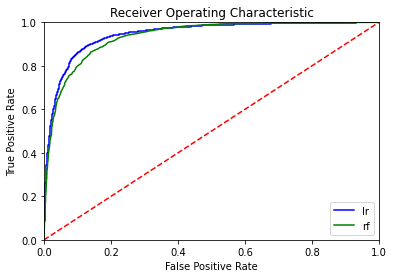

In [18]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_0)[:, 1])
fpr_rf, tpr_rf, t_ = roc_curve(y_test, rf_model.predict_proba(X_test_0)[:, 1])

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'lr')
plt.plot(fpr_rf, tpr_rf, 'g', label = 'rf')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
print("ROC AUC score for Logistic Regression: {}".format(roc_auc_score(y_test, lr_model.predict_proba(X_test_0)[:, 1])))
print("ROC AUC score for Random Forest: {}".format(roc_auc_score(y_test, rf_model.predict_proba(X_test_0)[:, 1])))

ROC AUC score for Logistic Regression: 0.94512688
ROC AUC score for Random Forest: 0.93558576


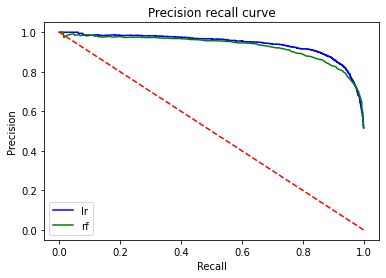

In [20]:
fpr_lr, tpr_lr, _ = precision_recall_curve(y_test, lr_model.predict_proba(X_test_0)[:, 1])
fpr_rf, tpr_rf, _ = precision_recall_curve(y_test,rf_model.predict_proba(X_test_0)[:, 1])

plt.title('Precision recall curve')
plt.plot(tpr_lr, fpr_lr, 'b', label = 'lr')
plt.plot(tpr_rf, fpr_rf, 'g', label = 'rf')
plt.plot([1, 0], [0, 1],'r--')
plt.legend(loc = 'lower left')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [21]:
print("Precision/recall score for Logistic Regression: {}".format(f1_score(y_test, lr_model.predict(X_test_0))))
print("Precision/recall score for Random Forest: {}".format(f1_score(y_test, rf_model.predict(X_test_0))))

Precision/recall score for Logistic Regression: 0.8827613568736361
Precision/recall score for Random Forest: 0.861926334449478


**examples of trickiest missclassified object**

*False positive*:

In [22]:
X_test[(y_test != lr_model.predict(X_test_0)) & (lr_model.predict_proba(X_test_0)[:, 1] >= 0.9)][4617]

'I saw this when it was in the theater, it started out so strong I mean back in 1980 this was a bold movie and the special effects were excellent AT THE time. Now you would have to of been at least 30 or so in 1980 to really understand this point because studying film historically misses the mind set at the time the expectations, and other related psychological factors. Now as I said the movie was engaging suspenseful and very entertaining. It builds to an excellent climax then.... IT ends I mean the person that described it as having a water balloon break in your hand before throwing it, besides being a very poetic description. In my experience, it was just not strong enough. My wife and I were well... how can I say this? We were upset, I mean we paid money, invested the time to watch the movie which was excellent. \\We both felt we were robbed with an ending that convinced us both the production company must of run out of money and could not raise enough to finish it correctly. In fa

*False negative*:

In [23]:
X_test[(y_test != lr_model.predict(X_test_0)) & (lr_model.predict_proba(X_test_0)[:, 1] <= 0.001)][8052]

"Who ever came up with story is one sick person. I rented it for our slumber party sleepover and all six of us got freaked out cause we're all in an acting class together, and we know a couple of the actors from class. Besides everybody screaming the whole freaky night, I had freaky nightmares. I kept thinking oh my God, if I get up to go to the bathroom to pee I'm going to be stabbed in the middle of wiping or something. I couldn't even go to the bathroom because we watched this gruesome horror movie. I also thought why are all the girls topless in this movie but we don't any of the boys units? You should make a horror film where the killer is a girl and chopping off units. I would watch that over and over. Call it hard or soft or something stupid like that. I'm only giving this movie a 9 because you FREAKED ME OUT FREAKS."

I think the main reason of missclassifications is the unique "style" of these reviews. We can see that in false negative missclassification there are such expressions as "gruesome", "freaky", "stupid", "freaked me out" and in the context of horror movie it has a positive meaning, but for сlassifier is can be a kind of negative. And in false positive we can see a lot of "positive" words, such as "excellent", "entertaining", "excellent", but in the review we can see a controversial opinion and truly negative words only in the last sentence about the end of the film.

Which model gives higher scores? Any ideas why? Please suggest 1-2 reasons.

**Answer:** Best score was given by Logistic regression. Reasons: 
- Tree algorithms suffer from the curse of dimensionality (we have one-hot-encoding for words and therefore the dimension is increased a lot).


### More sophisticated feature prerocessing

As we have seen, simple BOW can give us some result - it's time to improve it.

**Task 1.4 [1 point] - Frequencies calculation**

- Calculate top-20 words in train set and test set. *Are they meaningful?*
- Import `stopwords` and print some of them. What are those?
- Recalculate top-20 words in each set, but exclude stop words.
- Does now top-20 include more useful words?

In [24]:
from collections import Counter
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

In [25]:
tkz = WhitespaceTokenizer()

In [26]:
counts_train = Counter()
for sentence in X_train:
    counts_train.update(tkz.tokenize(sentence))
    
counts_test = Counter()
for sentence in X_test:
    counts_test.update(tkz.tokenize(sentence))
    
del counts_train['/><br']
del counts_test['/><br']

In [27]:
print("Top-20 words in train set:", counts_train.most_common(20))
print("Top-20 words in test set:", counts_test.most_common(20))

Top-20 words in train set: [('the', 230191), ('a', 124236), ('and', 122525), ('of', 114632), ('to', 106231), ('is', 82852), ('in', 68303), ('I', 52896), ('that', 51864), ('this', 45937), ('it', 43691), ('was', 37452), ('as', 33868), ('with', 33567), ('for', 32891), ('The', 27102), ('but', 27011), ('on', 24827), ('movie', 24625), ('are', 22817)]
Top-20 words in test set: [('the', 56841), ('a', 30860), ('and', 30139), ('of', 28340), ('to', 26337), ('is', 20376), ('in', 17277), ('I', 13077), ('that', 12696), ('this', 11259), ('it', 10738), ('was', 9246), ('as', 8642), ('for', 8179), ('with', 8154), ('but', 6779), ('The', 6660), ('on', 5939), ('movie', 5875), ('are', 5682)]


In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
for word in stopwords.words('english'):
    if word in counts_train:
        del counts_train[word]
        
for word in stopwords.words('english'):
    if word in counts_test:
        del counts_test[word]
        
del counts_train['/><br']
del counts_test['/><br']
del counts_test['-']
del counts_test['-']

In [30]:
print("Top-20 words in train set:\n", counts_train.most_common(20))
print("Top-20 words in test set:\n", counts_test.most_common(20))

Top-20 words in train set:
 [('I', 52896), ('The', 27102), ('movie', 24625), ('film', 22030), ('one', 16664), ('like', 14536), ('This', 9886), ('would', 9528), ('good', 9043), ('It', 8759), ('really', 8691), ('even', 8569), ('see', 8190), ('-', 7494), ('get', 6977), ('much', 6888), ('story', 6838), ('time', 6236), ('make', 5987), ('also', 5983)]
Top-20 words in test set:
 [('I', 13077), ('The', 6660), ('movie', 5875), ('film', 5367), ('one', 4024), ('like', 3597), ('would', 2394), ('This', 2393), ('good', 2392), ('It', 2193), ('really', 2124), ('even', 2038), ('see', 1965), ('get', 1800), ('story', 1688), ('much', 1619), ('time', 1528), ('could', 1514), ('make', 1498), ('/>The', 1496)]


**Task 1.5 [1 point] - Word Freqs by class**

How do you think, will top100 tokens for positive and negative classes be different? Use data to prove your point.

In [31]:
pos_train = X_train[y_train == 1]
neg_train = X_train[y_train == 0]

pos_test = X_test[y_test == 1]
neg_test = X_test[y_test == 0]

In [32]:
import string

def top_n_tokens(X, n_tokens):
    cnt = Counter()
    tkz =  TreebankWordTokenizer()
    
    for sentence in X:
        tokens = tkz.tokenize(sentence)
        tokens = [t.lower() for t in tokens]
        cnt.update(tokens)
        
    for word in stopwords.words('english'):
        if word in cnt:
            del cnt[word]
            
    for sym in string.punctuation:
        if sym in cnt:
            del cnt[sym]
            
    del_sym = ['/><br', '-', 'br', '--', "''", '...', "'s"]
    for sym in del_sym:
        del cnt[sym]
    
    labels, values = zip(*cnt.most_common(10))
    indSort = np.argsort(values)[::-1]
    
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35
    plt.bar(indexes, values)
    plt.xticks(indexes + bar_width, labels)
    plt.show()
            
    return cnt.most_common(n_tokens)

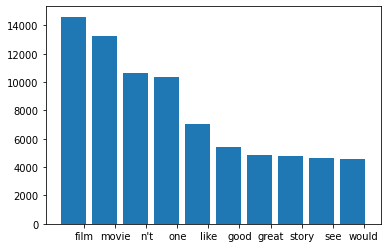

Top-100 words in positive train set:
 [('film', 14616), ('movie', 13249), ("n't", 10611), ('one', 10359), ('like', 7043), ('good', 5421), ('great', 4849), ('story', 4796), ('see', 4614), ('would', 4558), ('also', 4386), ('really', 4327), ('time', 4071), ('well', 4001), ('even', 3984), ('much', 3636), ('first', 3607), ('get', 3356), ('people', 3318), ('best', 3243), ('love', 3191), ('many', 2995), ('could', 2917), ('think', 2885), ('two', 2839), ('way', 2812), ('made', 2770), ('films', 2748), ('little', 2633), ('still', 2620), ('never', 2589), ('characters', 2555), ('make', 2553), ('movies', 2539), ('life', 2536), ('character', 2532), ('watch', 2465), ('seen', 2451), ('man', 2398), ('show', 2313), ('know', 2210), ('it.', 2210), ('ever', 2011), ('film.', 1965), ('makes', 1904), ('movie.', 1901), ('years', 1889), ('scene', 1881), ('new', 1873), ('young', 1867), ('say', 1858), ('though', 1855), ('go', 1854), ('back', 1844), ("'ve", 1819), ('real', 1812), ('find', 1803), ('end', 1786), ('ac

In [33]:
print("Top-100 words in positive train set:\n", top_n_tokens(pos_train, 100))

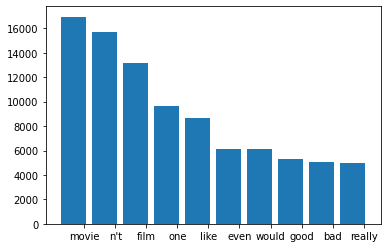

Top-100 words in negative train set:
 [('movie', 16952), ("n't", 15660), ('film', 13135), ('one', 9679), ('like', 8694), ('even', 6155), ('would', 6106), ('good', 5280), ('bad', 5070), ('really', 4950), ('could', 4514), ('see', 4284), ('time', 3985), ('get', 3897), ('much', 3833), ('people', 3644), ('make', 3590), ('story', 3574), ('first', 3365), ('made', 3298), ('plot', 2924), ('acting', 2919), ('also', 2857), ('think', 2854), ('movies', 2815), ('well', 2754), ('way', 2748), ('movie.', 2622), ('never', 2617), ('character', 2594), ('know', 2564), ('characters', 2554), ('watch', 2537), ('it.', 2439), ('ever', 2408), ('little', 2376), ('two', 2353), ('say', 2347), ('better', 2336), ('many', 2329), ("'m", 2308), ("'ve", 2299), ('seen', 2263), ('nothing', 2233), ('something', 2181), ('films', 2163), ('go', 2090), ('scene', 2059), ('thing', 2046), ('show', 1995), ('watching', 1986), ('scenes', 1971), ('end', 1959), ('great', 1951), ('film.', 1934), ('actually', 1909), ('worst', 1869), ('st

In [34]:
print("Top-100 words in negative train set:\n", top_n_tokens(neg_train, 100))

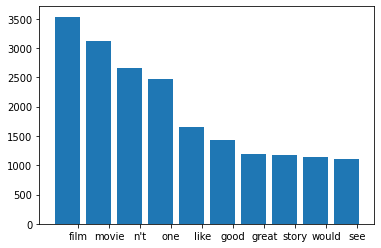

Top-100 words in positive test set:
 [('film', 3535), ('movie', 3119), ("n't", 2659), ('one', 2469), ('like', 1649), ('good', 1439), ('great', 1183), ('story', 1166), ('would', 1136), ('see', 1112), ('really', 1090), ('also', 1071), ('time', 1042), ('well', 951), ('even', 948), ('first', 935), ('get', 830), ('much', 829), ('people', 824), ('best', 797), ('love', 741), ('many', 740), ('could', 737), ('way', 721), ('made', 694), ('two', 691), ('think', 680), ('still', 680), ('show', 678), ('life', 662), ('character', 643), ('little', 625), ('seen', 624), ('make', 617), ('films', 615), ('never', 604), ('characters', 596), ('watch', 591), ('movies', 548), ('it.', 527), ('man', 520), ('know', 513), ('new', 512), ('back', 509), ('years', 489), ('quite', 486), ("'ve", 483), ('say', 476), ('though', 475), ('makes', 471), ('ever', 471), ('real', 466), ('film.', 457), ('movie.', 453), ('scenes', 451), ('acting', 429), ('find', 429), ('scene', 427), ('go', 424), ('young', 423), ('end', 419), ('se

In [35]:
print("Top-100 words in positive test set:\n", top_n_tokens(pos_test, 100))

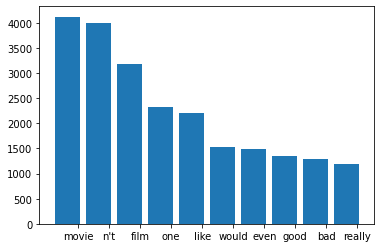

Top-100 words in negative test set:
 [('movie', 4124), ("n't", 3998), ('film', 3182), ('one', 2324), ('like', 2213), ('would', 1535), ('even', 1493), ('good', 1351), ('bad', 1284), ('really', 1182), ('could', 1139), ('get', 1049), ('time', 1018), ('see', 1017), ('much', 953), ('make', 925), ('story', 899), ('people', 832), ('first', 788), ('made', 778), ('acting', 755), ('think', 734), ('plot', 726), ('way', 712), ('well', 709), ('also', 696), ('watch', 684), ('characters', 672), ('little', 644), ('movies', 637), ('movie.', 635), ('two', 627), ('character', 619), ('never', 609), ('ever', 602), ('know', 597), ('it.', 597), ('better', 582), ('nothing', 571), ("'m", 569), ('many', 559), ('something', 537), ('watching', 533), ('thing', 532), ('say', 524), ("'ve", 519), ('films', 518), ('seen', 514), ('actually', 512), ('great', 507), ('show', 506), ('scenes', 491), ('end', 485), ('film.', 480), ('worst', 479), ('going', 473), ('scene', 472), ('go', 471), ('actors', 459), ('ca', 449), ('sti

In [36]:
print("Top-100 words in negative test set:\n", top_n_tokens(neg_test, 100))

*Answer:* We can see that top100 tokens for positive and negative classes are different. In negative cases, we can see such words as "bad", "worst" and etc. (negative adjectives) and in positive cases such words as "good", "great" (positive).

**Task 1.6 [2 points] - Reducing dimensionality**

The goal is to reduce number of features to 15000.

Implement the following methods of dimensinality reduction:
1. Use CountVectorizer, but leave only 15k most frequent tokens
2. Use HashingVectorizer with 15k features
3. Use 15k most important features from perspective of previously trained RandomForest

*Hints:*
- in 1 and 2 you don't have to apply nltk.corpus.stopwords, vectorizers have `stopwords` parameter
- in 1 look for `vocabulary` parameter
- in 3... remember `lab02`? You may use `X_train_0` and `X_test_0` as input matrices

Train LogisticRegression and RandomForest on each dataset and compare ROC AUC scores of the classifiers.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

counts_train = Counter()
for sentence in X_train:
    counts_train.update(tkz.tokenize(sentence))
    
for word in stopwords.words('english'):
    if word in counts_train:
        del counts_train[word]
        
        
train_most_common, _ = zip(*counts_train.most_common(15000))

cnt_vect_train = CountVectorizer(stop_words='english', vocabulary=train_most_common, max_features=15000, lowercase=False)
X_train_vect = cnt_vect_train.fit_transform(X_train)
X_test_vect = cnt_vect_train.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=500, n_jobs=4)
lr_model = LogisticRegression(max_iter=1e5)

rf_model.fit(X_train_vect, y_train)
lr_model.fit(X_train_vect, y_train)

print("ROC AUC score for Logistic Regression: {}".format(roc_auc_score(y_test, lr_model.predict_proba(X_test_vect)[:, 1])))
print("ROC AUC score for Random Forest: {}".format(roc_auc_score(y_test, rf_model.predict_proba(X_test_vect)[:, 1])))

print("LR accuracy: {}".format(accuracy_score(lr_model.predict(X_test_vect), y_test)))
print("RF accuracy: {}".format(accuracy_score(rf_model.predict(X_test_vect), y_test)))

ROC AUC score for Logistic Regression: 0.93073568
ROC AUC score for Random Forest: 0.928096
LR accuracy: 0.8646
RF accuracy: 0.853


In [38]:
cnt_vect = HashingVectorizer(stop_words='english', n_features=15000)
X_train_vect = cnt_vect.fit_transform(X_train)
X_test_vect = cnt_vect.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=500, n_jobs=4)
lr_model = LogisticRegression(max_iter=1e5)

rf_model.fit(X_train_vect, y_train)
lr_model.fit(X_train_vect, y_train)

print("ROC AUC score for Logistic Regression: {}".format(roc_auc_score(y_test, lr_model.predict_proba(X_test_vect)[:, 1])))
print("ROC AUC score for Random Forest: {}".format(roc_auc_score(y_test, rf_model.predict_proba(X_test_vect)[:, 1])))

print("LR accuracy: {}".format(accuracy_score(lr_model.predict(X_test_vect), y_test)))
print("RF accuracy: {}".format(accuracy_score(rf_model.predict(X_test_vect), y_test)))

ROC AUC score for Logistic Regression: 0.9414723199999999
ROC AUC score for Random Forest: 0.9295921600000001
LR accuracy: 0.8648
RF accuracy: 0.8532


In [39]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=4)
rf_model.fit(X_train_vect, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=4)

In [40]:
forest_coefs = rf_model.feature_importances_
important_feature_idx = np.argsort(np.abs(forest_coefs))[-15000:]
X_train_selected = X_train_vect[:, important_feature_idx]
X_test_selected = X_test_vect[:, important_feature_idx]

In [41]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=4)
lr_model = LogisticRegression(max_iter=1e5)

rf_model.fit(X_train_selected, y_train)
lr_model.fit(X_train_selected, y_train)

print("ROC AUC score for Logistic Regression: {}".format(roc_auc_score(y_test, lr_model.predict_proba(X_test_selected)[:, 1])))
print("ROC AUC score for Random Forest: {}".format(roc_auc_score(y_test, rf_model.predict_proba(X_test_selected)[:, 1])))

print("LR accuracy: {}".format(accuracy_score(lr_model.predict(X_test_selected), y_test)))
print("RF accuracy: {}".format(accuracy_score(rf_model.predict(X_test_selected), y_test)))

ROC AUC score for Logistic Regression: 0.94147168
ROC AUC score for Random Forest: 0.92981488
LR accuracy: 0.8648
RF accuracy: 0.8506


**Task 1.7 [2 points] - Token Normalization**

Choose the best working method from previous task. Try improve it by applying a token normalization technique.

You may use one of normalizers imported below, but feel free to experiment.

Do the following:
- Apply normalizer to X_train, X_test
- Build BOW with CountVectorizer + stopwords. What are the shapes of train and test matrices now?
- Reduce dimensionality with the best method from Task 2.6. You may try all of them
- Train LR/RF to examine whether ROC AUC or Accuracy was improved.

**WordNetLemmatize**

In [42]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

wrdnet = WordNetLemmatizer()
X_train_normalized = pd.Series([wrdnet.lemmatize(x) for x in X_train])
X_test_normalized = pd.Series([wrdnet.lemmatize(x) for x in X_test])

cnt = CountVectorizer(stop_words='english', lowercase=False)
X_train_vect = cnt.fit_transform(X_train_normalized)
X_test_vect = cnt.transform(X_test_normalized)

print(X_train_vect.shape, X_test_vect.shape)

(20000, 85030) (5000, 85030)


In [43]:
cnt_vect = HashingVectorizer(stop_words='english', n_features=15000)
X_train_vect = cnt_vect.fit_transform(X_train_normalized)
X_test_vect = cnt_vect.transform(X_test_normalized)

rf_model = RandomForestClassifier(n_estimators=500, n_jobs=4)
lr_model = LogisticRegression(max_iter=1e5)

rf_model.fit(X_train_vect, y_train)
lr_model.fit(X_train_vect, y_train)

print("ROC AUC score for Logistic Regression: {}".format(roc_auc_score(y_test, lr_model.predict_proba(X_test_vect)[:, 1])))
print("ROC AUC score for Random Forest: {}".format(roc_auc_score(y_test, rf_model.predict_proba(X_test_vect)[:, 1])))

print("LR accuracy: {}".format(accuracy_score(lr_model.predict(X_test_vect), y_test)))
print("RF accuracy: {}".format(accuracy_score(rf_model.predict(X_test_vect), y_test)))

ROC AUC score for Logistic Regression: 0.9414723199999999
ROC AUC score for Random Forest: 0.92848744
LR accuracy: 0.8648
RF accuracy: 0.8494


**PorterStemmer**

In [44]:
prt = PorterStemmer()
X_train_normalized = pd.Series([prt.stem(x) for x in X_train])
X_test_normalized = pd.Series([prt.stem(x) for x in X_test])

cnt = CountVectorizer(stop_words='english', lowercase=False)
X_train_vect = cnt.fit_transform(X_train_normalized)
X_test_vect = cnt.transform(X_test_normalized)

print(X_train_vect.shape, X_test_vect.shape)

(20000, 68257) (5000, 68257)


In [45]:
cnt_vect = HashingVectorizer(stop_words='english', n_features=15000)
X_train_vect = cnt_vect.fit_transform(X_train_normalized)
X_test_vect = cnt_vect.transform(X_test_normalized)

rf_model = RandomForestClassifier(n_estimators=500, n_jobs=4)
lr_model = LogisticRegression(max_iter=1e5)

rf_model.fit(X_train_vect, y_train)
lr_model.fit(X_train_vect, y_train)

print("ROC AUC score for Logistic Regression: {}".format(roc_auc_score(y_test, lr_model.predict_proba(X_test_vect)[:, 1])))
print("ROC AUC score for Random Forest: {}".format(roc_auc_score(y_test, rf_model.predict_proba(X_test_vect)[:, 1])))

print("LR accuracy: {}".format(accuracy_score(lr_model.predict(X_test_vect), y_test)))
print("RF accuracy: {}".format(accuracy_score(rf_model.predict(X_test_vect), y_test)))

ROC AUC score for Logistic Regression: 0.9414497600000002
ROC AUC score for Random Forest: 0.9297744
LR accuracy: 0.8646
RF accuracy: 0.8522


## Part 2. Word Embeddings [7 points]

In [46]:
import gensim.downloader
from gensim.utils import tokenize

Here is the list of pretrained word embedding models. We suggest using `glove-wiki-gigaword-100`.

In [47]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [48]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

**Task 2.1 [2 point] - WordEmbeddings Geometry**

As you probably know, vector space of word embeddings has non-trivial geometry: some word relations (like country-capital or single-plural) cab be represented by vectors, like: **(king - man) + woman = queen**

<img src="https://linkme.ufanet.ru/images/5687a2011b49eb2413912f1c7d0fb0bd.png" width=600px>

Check this statement on words from the above picture with `word_embeddings.most_similar` function. Pay attention to `positive` and `negative` params.

Provide **several** examples, make sure to present different relations: some for nouns, some for verbs.

In [49]:
word_embeddings.most_similar(positive=['woman', 'king'], negative=['man'])[0]

('queen', 0.7698541283607483)

In [50]:
word_embeddings.most_similar(positive=['cats', 'dog'], negative=['cat'])[0]

('dogs', 0.8747849464416504)

In [51]:
word_embeddings.most_similar(positive=['slower', 'fast'], negative=['slowest'])[0]

('faster', 0.7201759815216064)

In [52]:
word_embeddings.most_similar(positive=['fast', 'longer'], negative=['faster'])[0]

('long', 0.7793698906898499)

In [53]:
word_embeddings.most_similar(positive=['father', 'girl'], negative=['mother'])[0]

('boy', 0.8989257216453552)

**Task 2.2 [2 point] - POS analysis**

Use POS tagger to calculate most common POS in the dataset. 
Here you may read about nltk-taggers: [link](https://www.inf.ed.ac.uk/teaching/courses/icl/nltk/tagging.pdf)

- If you were to design POS-related weights, how would you do it? 
- What POS would get the higher weight? 

In [54]:
from nltk.tag import DefaultTagger

In [55]:
from nltk import tokenize
from nltk import tag

In [56]:
X_tokenized = [tokenize.word_tokenize(x) for x in X]

In [57]:
X_taggeg = [tag.pos_tag(sent) for sent in X_tokenized]

In [58]:
tags = [word[1] for sentence in X_taggeg for word in sentence]
tag_count = Counter(tags)

In [59]:
tag_count.most_common(5)

[('NN', 991980),
 ('NNP', 699468),
 ('DT', 680835),
 ('IN', 665110),
 ('JJ', 494948)]

We can see that the most common POS is Nouns, Determiner, Preposition or subordinating conjunction and Adjectives. In my opinion,  it's important to take into account adjectives ("good", "bad", "interesting") in the film reviews, for this reason, weight for adjective should be bigger than for other words. The determinant does not carry a lot of meaning and does not color the text emotionally (although there are many of them in the texts), therefore there is no need to take it into account and we can put a small weight on it.

**Task 2.3 [3 points] - WordEmbeddings**

Use dense vector representations to construct vector-representation of each review, then train a model (LR or RF).

Compare results of the new model to results of the models above.
**Important**
- If you just sum embeddings of each token to get an embedding of the whole review, the cost of the task is **[2 points]**
- For **[3 points]** you have to use either TF-IDF weight or weights that you designed from POS tags.

***THIS TASK DIDN'T COMPLETED =(***

In [60]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
# TfIdf weights counting

vectorizer_tf = TfidfVectorizer(tokenizer=tkz.tokenize)

vectors = vectorizer_tf.fit_transform(X_train)
feature_names = vectorizer_tf.get_feature_names()
dense = vectors.todense()
weights = pd.DataFrame(dense, columns=feature_names)

/Users/anastasialavruhina/.virtualenvs/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
vectors_test = vectorizer_tf.transform(X_test)
feature_names_test = vectorizer_tf.get_feature_names()
dense_test = vectors_test.todense()


/Users/anastasialavruhina/.virtualenvs/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
weights_test = pd.DataFrame(dense_test, columns=feature_names)

In [79]:
def sent2vector(sentence, sentence_id):
    cur_vec = np.array([0 for x in range(100)])
    tokened = tkz.tokenize(sentence)
    
    words = filter(lambda x: x in word_embeddings.index_to_key, tokened)
    words = filter(lambda x: x in feature_names_test, words)
    for word in words:
        cur_vec = cur_vec + weights[word][sentence_id]*np.array(word_embeddings[word.lower()])
        
    return cur_vec
    
vect_sent2vector = np.frompyfunc(sent2vector, 1, 1)

In [73]:
X_train_vectored = [sent2vector(snt, id) for id, snt in enumerate(X_train.to_numpy())]

In [80]:
X_test_vectored = [sent2vector(snt, id) for id, snt in enumerate(X_test.to_numpy())]

In [ ]:
lr_model = LogisticRegression(max_iter=1e5)
lr_model.fit(X_train_vectored, y_train)

print("ROC AUC score for Logistic Regression: {}".format(roc_auc_score(y_test, lr_model.predict_proba(X_test_vectored)[:, 1])))
print("LR accuracy: {}".format(accuracy_score(lr_model.predict(X_test_vectored), y_test)))